In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Electric_Vehicle_Population_Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape


(150482, 17)

In [4]:
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
6,2C4RC1N77H,King,Kent,WA,98042.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,47.0,1815593,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
9,7SAYGDEF0P,King,Bellevue,WA,98004.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,240416207,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [6]:
print(df.columns)


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [7]:
df.dropna(inplace=True)

In [8]:
df['Electric Range'] = df['Electric Range'].astype('int')

In [9]:
df['Electric Range'].dtypes

dtype('int32')

In [10]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

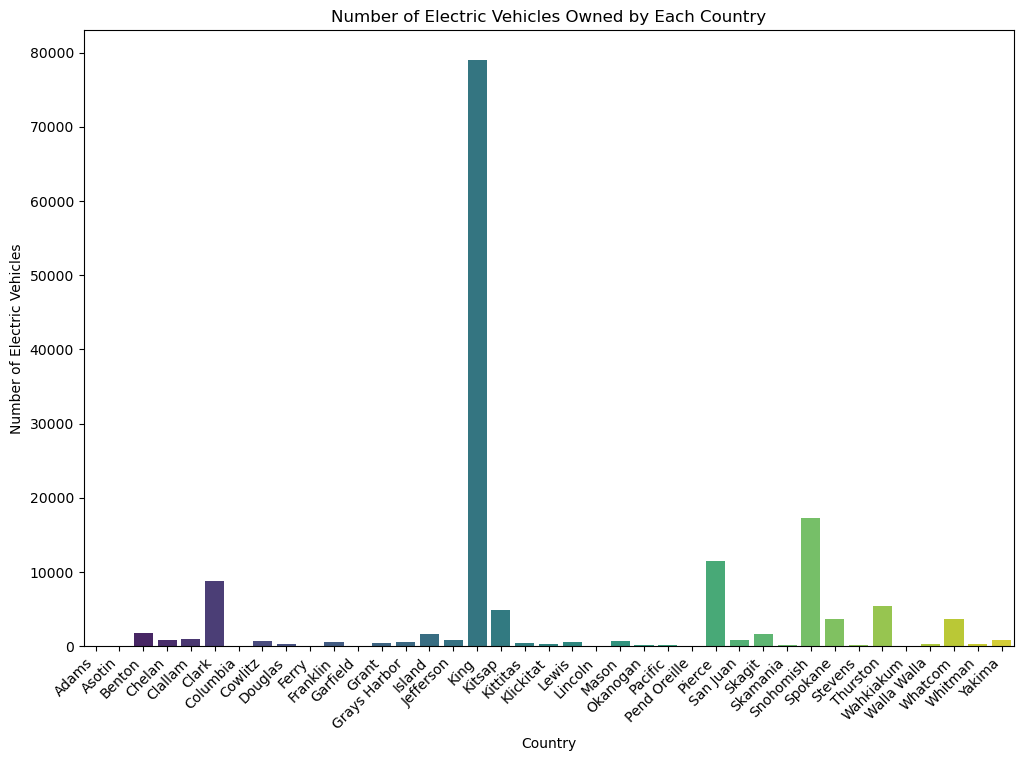

In [11]:

# Assuming df is already loaded with the columns 'County' and 'VIN (1-10)'

# Count the number of vehicles (VINs) for each country
df_count = df.groupby('County')['VIN (1-10)'].count().reset_index()
df_count.rename(columns={'VIN (1-10)': 'Number_of_Vehicles'}, inplace=True)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_count, x='County', y='Number_of_Vehicles', hue='County', palette='viridis', dodge=False, legend=False)

plt.title('Number of Electric Vehicles Owned by Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()


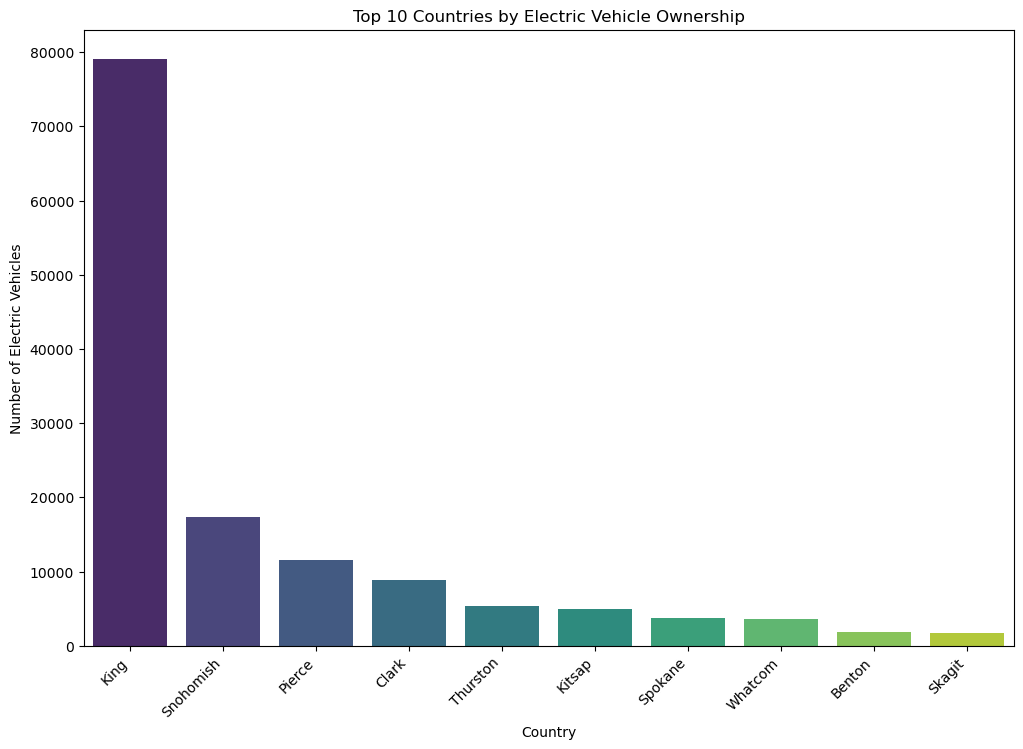

In [17]:
# Assuming df is already loaded with the columns 'County' and 'VIN (1-10)'

# First, group by 'County' and count the number of vehicles (VINs)
df_count = df.groupby('County')['VIN (1-10)'].count().reset_index()
df_count.rename(columns={'VIN (1-10)': 'Number_of_Vehicles'}, inplace=True)

# Show only the top 10 countries by EV ownership
top_countries = df_count.nlargest(10, 'Number_of_Vehicles')

# Plotting the bar chart for the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='County', y='Number_of_Vehicles', hue='County', palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Countries by Electric Vehicle Ownership')
plt.xlabel('Country')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()


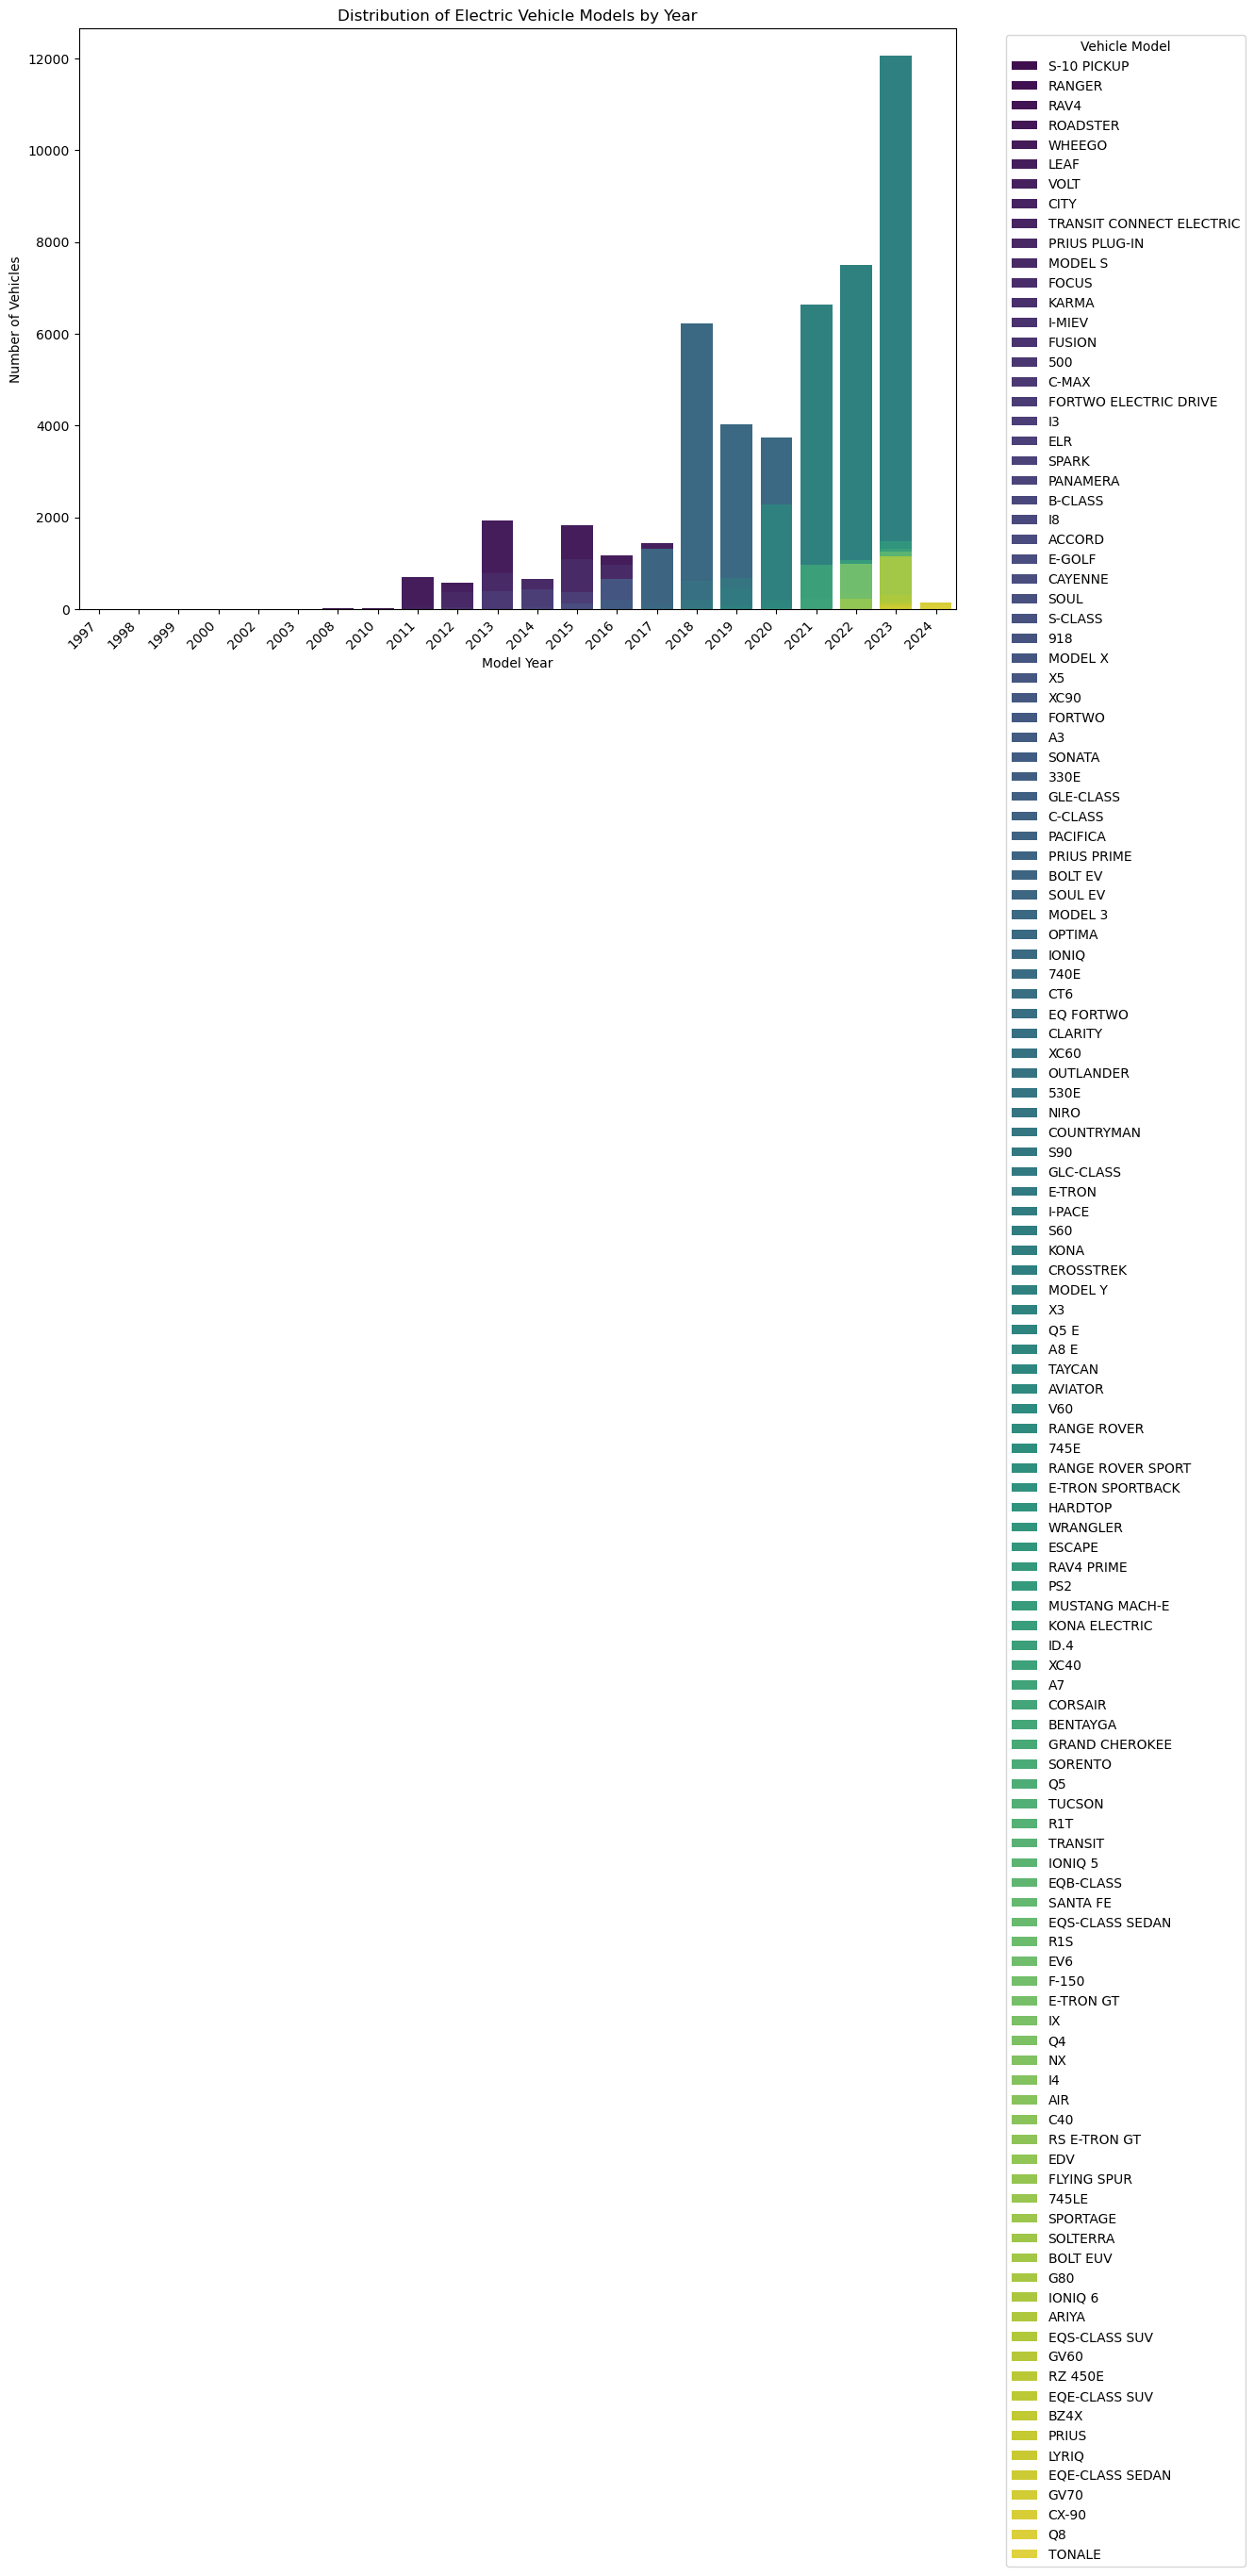

In [42]:


# Assuming df is already loaded with the relevant columns
# Example: df = pd.read_csv('electric_vehicle_sales.csv')

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Model Year', hue='Model', palette='viridis', dodge=False)
plt.title('Distribution of Electric Vehicle Models by Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


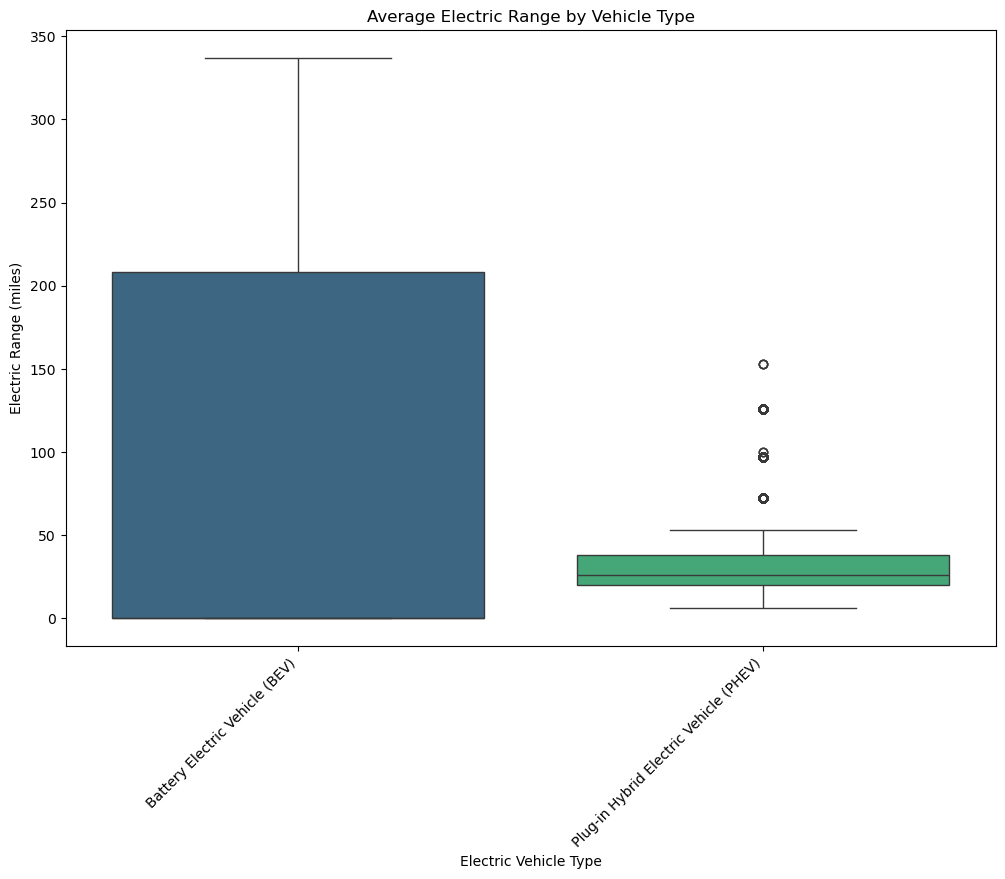

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Electric Range',hue='Electric Vehicle Type', palette='viridis', dodge=False, legend=False)
plt.title('Average Electric Range by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45, ha='right')
plt.show()


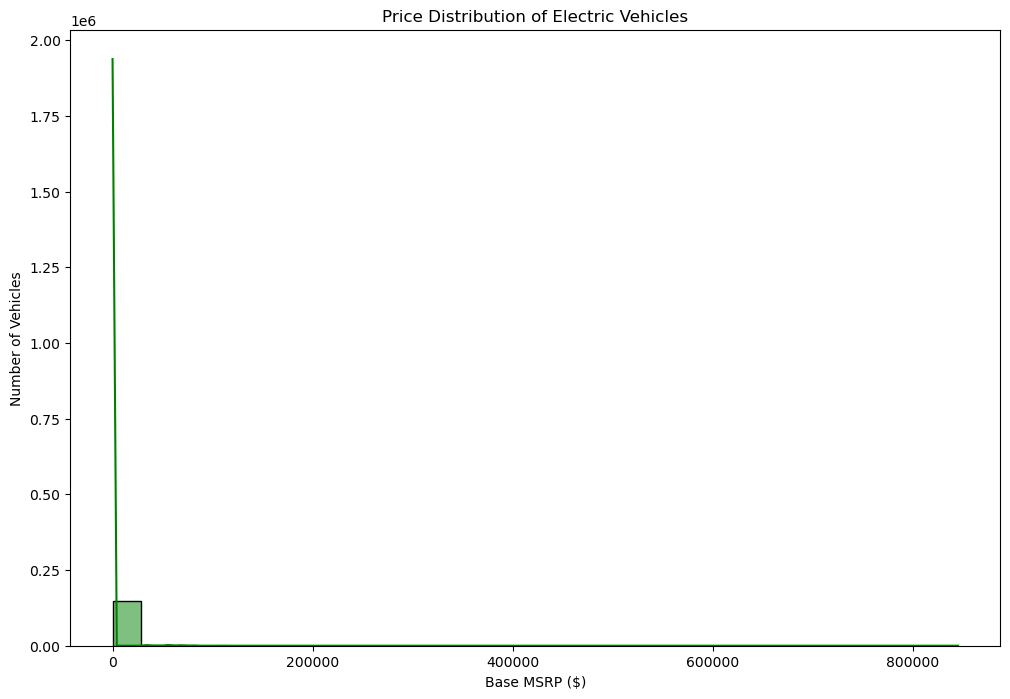

In [46]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Base MSRP'], kde=True, color='green', bins=30)
plt.title('Price Distribution of Electric Vehicles')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Number of Vehicles')
plt.show()


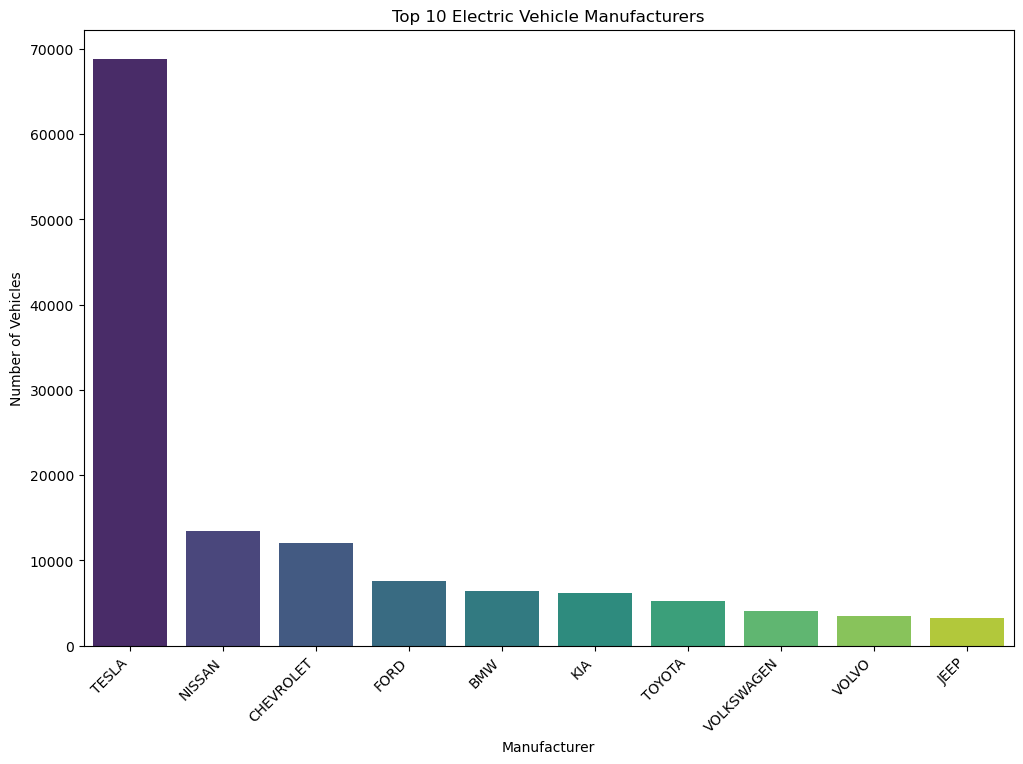

In [65]:
df_manufacturers = df.groupby('Make')['VIN (1-10)'].count().reset_index(name='Number_of_Vehicles')
df_manufacturers = df_manufacturers.sort_values(by='Number_of_Vehicles', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_manufacturers, x='Make', y='Number_of_Vehicles',hue='Make', palette='viridis',dodge=False, legend=False)
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


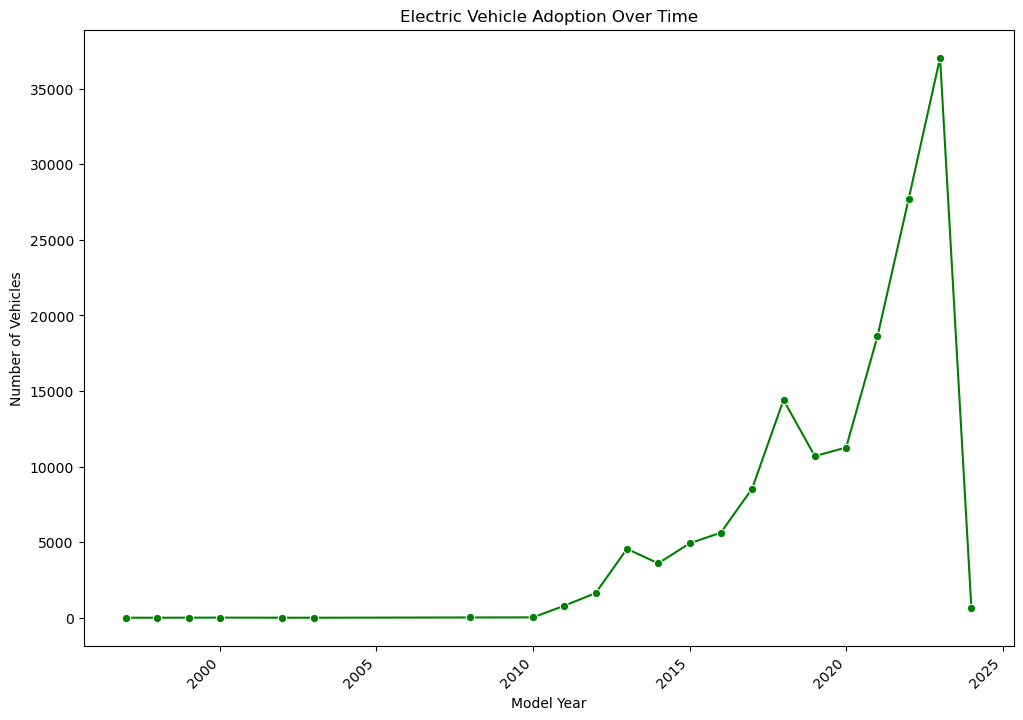

In [52]:
df_adoption = df.groupby('Model Year')['VIN (1-10)'].count().reset_index(name='Number_of_Vehicles')

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_adoption, x='Model Year', y='Number_of_Vehicles', marker='o', color='green')
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


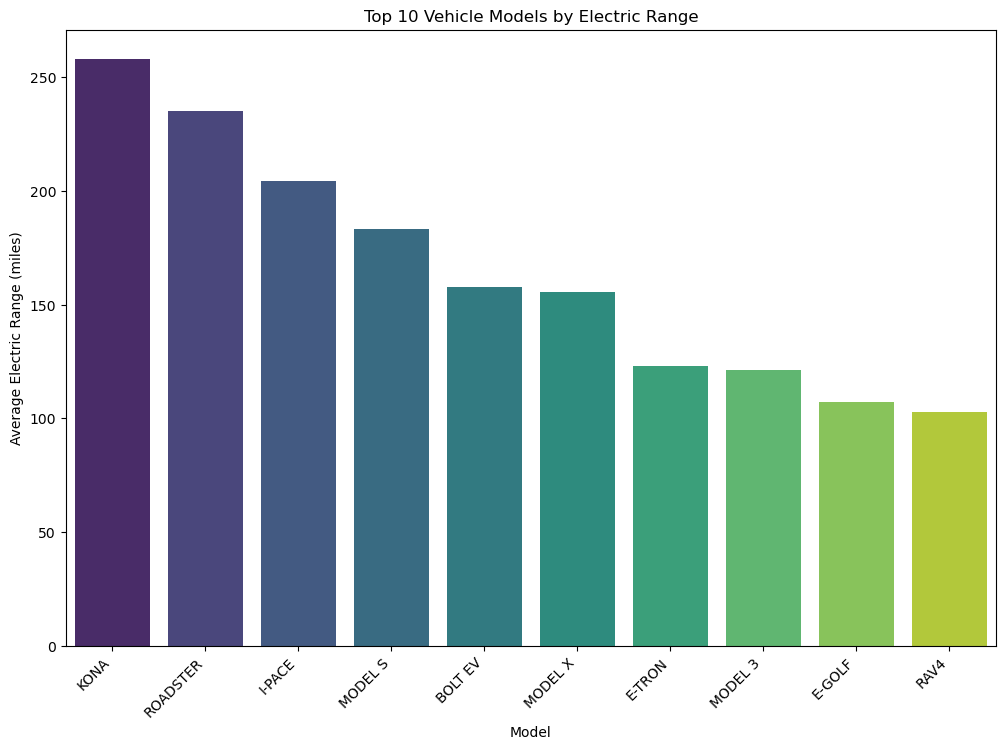

In [69]:
df_model_range = df.groupby('Model')['Electric Range'].mean().reset_index(name='Average_Range')
df_model_range = df_model_range.sort_values(by='Average_Range', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_model_range, x='Model', y='Average_Range', hue='Model', palette='viridis',dodge=False ,legend=False)
plt.title('Top 10 Vehicle Models by Electric Range')
plt.xlabel('Model')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45, ha='right')
plt.show()


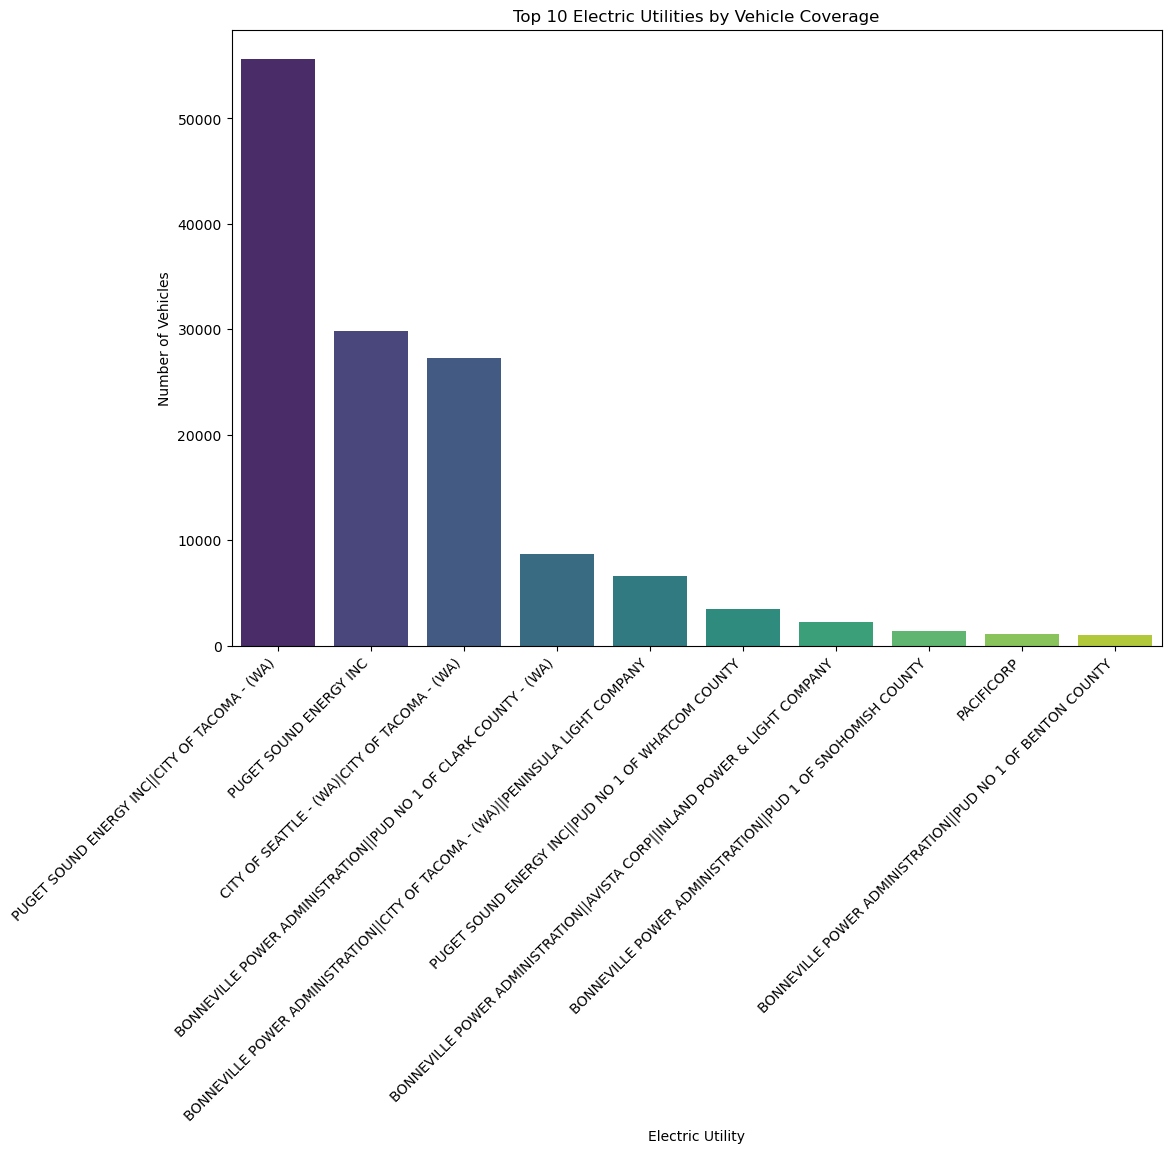

In [71]:
df_utility = df.groupby('Electric Utility')['VIN (1-10)'].count().reset_index(name='Number_of_Vehicles')
df_utility = df_utility.sort_values(by='Number_of_Vehicles', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_utility, x='Electric Utility', y='Number_of_Vehicles', hue='Electric Utility', palette='viridis',dodge=False, legend=False)
plt.title('Top 10 Electric Utilities by Vehicle Coverage')
plt.xlabel('Electric Utility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


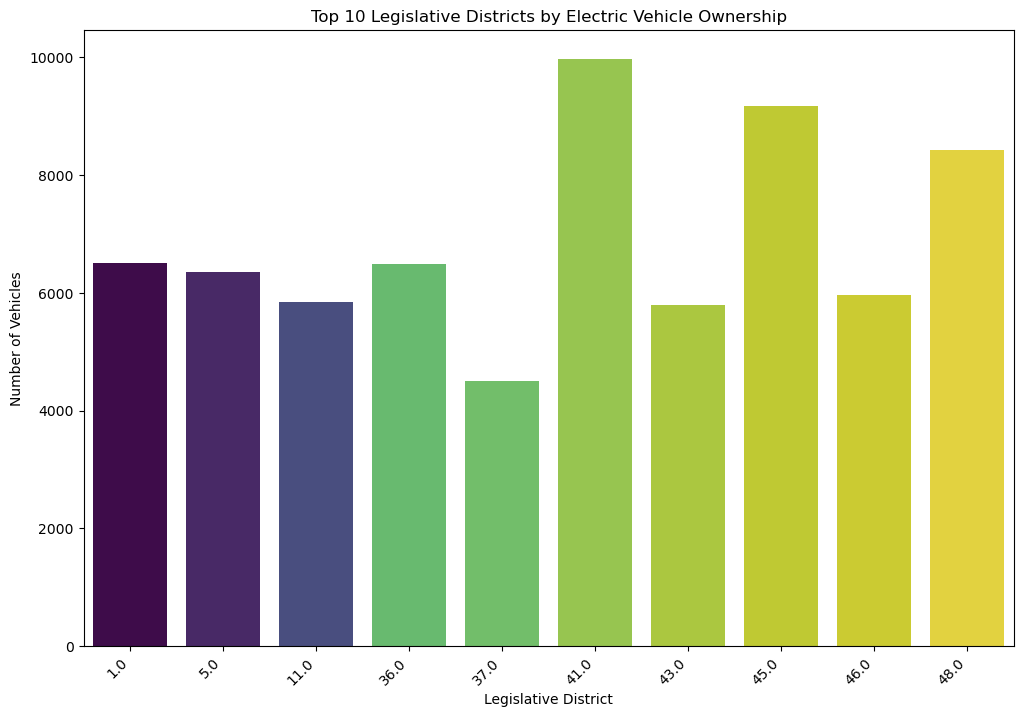

In [73]:
df_district = df.groupby('Legislative District')['VIN (1-10)'].count().reset_index(name='Number_of_Vehicles')
df_district = df_district.sort_values(by='Number_of_Vehicles', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_district, x='Legislative District', y='Number_of_Vehicles', hue='Legislative District', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Legislative Districts by Electric Vehicle Ownership')
plt.xlabel('Legislative District')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()
